In [ ]:
apple width ≈ 6 cm
apple lengh ≈ 6 cm
banana width ≈ 4 cm
banana lengh ≈ 8 cm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [7]:
def generate_dataset(n):
    apple_width=np.random.normal(6, 1, n)
    apple_length=np.random.normal(6 ,1 , n)
    banana_width=np.random.normal(4 , 1 , n)
    banana_length=np.random.normal(8 ,1 ,n)
    width=np.concatenate((apple_width,banana_width))
    lenght=np.concatenate((apple_length,banana_length))
    x=np.array([width,lenght]).T
    Y_apples=np.zeros(n,dtype="int")
    Y_bananas=np.ones(n,dtype="int")
    Y=np.concatenate((Y_apples,Y_bananas))
    return x,Y


In [8]:
X_train,Y_train=generate_dataset(100)

In [9]:
x_width=3
x_lenght=9

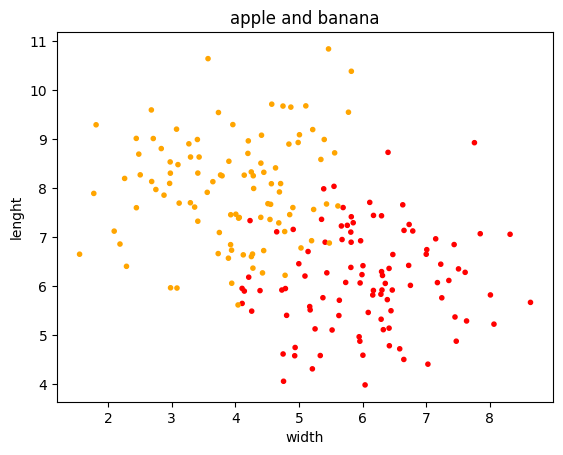

In [10]:
cmap=['red','orange']
plt.scatter(X_train[:,0],X_train[:,1], c=Y_train,cmap=ListedColormap(cmap), marker=".")
# plt.scatter(x_width,x_lenght,c="blue",marker="o")
plt.title("apple and banana")
plt.xlabel("width")
plt.ylabel("lenght")
plt.show()

In [26]:
class KNN:
    def __init__(self,k):
        self.k=k

    def fit(self,x,Y):
        self.X_train=x
        self.Y_train=Y

    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def predict(self,list_x):
        list_y=[]
        for x in list_x:
            distances=[]
            for x_train in X_train:
                d=self.euclidean_distance(x,x_train)
                distances.append(d)
            
            nearest_neighbores=np.argsort(distances)[0:self.k]
            result=np.bincount(Y_train[nearest_neighbores])
            y=np.argmax(result)
            list_y.append(y)

            return list_y


In [27]:
knn=KNN(k=5)
knn.fit(X_train,Y_train)

In [30]:
new_fruit=np.array([6,8])
new_fruit_2=np.array([3,6])
new_fruit_3=np.array([4,7])
new_fruits=[new_fruit,new_fruit_2,new_fruit_3]
outputs=knn.predict(new_fruits)

In [32]:
for output in outputs:
    if output==0:
        print("apple")
    else:
        print("banana")

apple
